# Maksimizasyon Problemi

In [1]:
import numpy as np

In [2]:
a1 = np.array([1,0,0,1,1])
a2 = np.array([1,0,0,0,1])

In [3]:
a1.sum(), a2.sum()

(3, 2)

In [4]:
def fitness(a):
    return a.sum()

In [5]:
fitness(a2)

2

In [6]:
def agent(k = 5):
    return np.random.choice([0,1], size= k)

In [7]:
a3 = agent()

In [8]:
a3

array([1, 0, 0, 0, 0])

In [9]:
toplum = np.array([agent()  for i in range(10)])
toplum

array([[0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [10]:
uyumlar = np.array([fitness(toplum[i])  for i in range(10)])
uyumlar

array([2, 2, 4, 3, 3, 1, 3, 1, 2, 1])

In [11]:
olasiliklar = uyumlar / uyumlar.sum()
olasiliklar

array([0.09090909, 0.09090909, 0.18181818, 0.13636364, 0.13636364,
       0.04545455, 0.13636364, 0.04545455, 0.09090909, 0.04545455])

In [12]:
print(olasiliklar.argsort())

[5 7 9 0 1 8 3 4 6 2]


In [13]:
eniyi = olasiliklar.argsort()[-1]
eniyi

2

In [14]:
toplum[eniyi]

array([1, 1, 1, 1, 0])

In [15]:
secim = np.random.choice(10, 2, replace= False, p=olasiliklar)
secim

array([2, 4])

In [16]:
np.random.choice(4, 1, replace= False, p=[0,0,0,1])

array([3])

In [17]:
secim = np.random.choice(10, 2, replace= False, p=olasiliklar)
secim

array([1, 6])

In [18]:
toplum

array([[0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [19]:
kisi0 = toplum[secim[0]]
print("kisi0: ", kisi0)
kisi1 = toplum[secim[1]]
print("kisi1: ", kisi1)

kisi0:  [0 1 0 0 1]
kisi1:  [0 1 0 1 1]


In [20]:
n = len(kisi0)//2
print("Kesim noktasi: ",n)

Kesim noktasi:  2


In [21]:
print(kisi0[:n], kisi1[n:])

[0 1] [0 1 1]


In [22]:
# birlestir
np.hstack((kisi0[:n],kisi1[n:]))

array([0, 1, 0, 1, 1])

In [23]:
import matplotlib.pyplot as plt
plt.plot([2.25,3.75], [5,5], 'go', markersize=40)
plt.plot([3], [3], 'r^', markersize=60)
plt.plot([2.5,3,3.5], [1.15,1,1.15], 'b', linewidth=8)
plt.axis((1,5,0,6))
plt.show()

<Figure size 640x480 with 1 Axes>

In [24]:
gozler = [2.25,3.75,5,5,4] # 40 yerine 4 yazdim, butun degerler 1-10 arasinda olsun
burun = [3,3,6]# ayni nedenle 60 yerine 6 yazdim,
agiz = [2.5,3,3.5, 1.15,1,1.15,8]
adam = np.array(gozler + burun + agiz)

adam

array([2.25, 3.75, 5.  , 5.  , 4.  , 3.  , 3.  , 6.  , 2.5 , 3.  , 3.5 ,
       1.15, 1.  , 1.15, 8.  ])

In [25]:
len(adam)

15

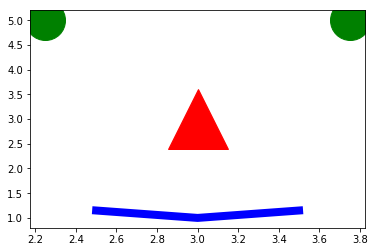

In [26]:
def adam_ciz(adam):
    plt.plot([adam[0],adam[1]], [adam[2],adam[3]], 'go', markersize=adam[4]*10)
    plt.plot(adam[5], adam[6], 'r^', markersize=adam[7]*10)
    plt.plot([adam[8],adam[9],adam[10]], [adam[11],adam[12],adam[13]], 'b', linewidth=adam[14])
    plt.show()
adam_ciz(adam)

In [27]:
v = np.random.rand(15) * 10
v

array([3.59305214, 6.92349955, 1.29995512, 7.56828546, 7.32442012,
       6.14180002, 1.86071328, 7.49936114, 3.1822179 , 0.28972003,
       7.94940771, 1.83236414, 8.58971283, 7.4328741 , 1.3241431 ])

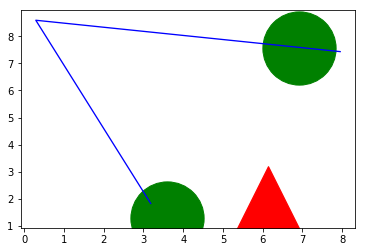

In [28]:
adam_ciz(v)

In [29]:
# Basariyi (fitness) Maximize et
1/ (1 + sum((adam - v)**2))

0.004398519078030424

In [30]:
# Hatayi Minimize et
sum((adam - v)**2)

226.34924693057866

In [31]:
def kisi2():
    # rastegele 15 elemanli, degerler 1-10 arasinda olan, bir vektor yazalim
    return np.random.rand(15) * 10 

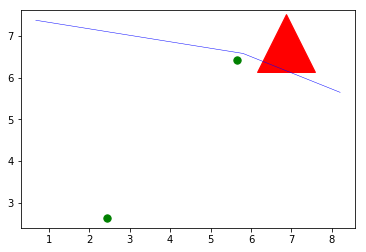

In [32]:
adam_ciz(kisi2())

In [33]:
def uyum2(birey):
    return 1/ (1 + sum((adam - birey)**2))

In [34]:
def mutasyon2(kisi, p):
    """ p olasilikla kisinin bir ozelligine 0-10 arasinda rastgele
    deger atanir."""
    if np.random.rand() < p:
        m = np.random.choice(len(kisi))
        kisi[m] = np.random.rand() * 10

In [35]:
def en_iyi(toplum, olasiliklar):
    eniyi = olasiliklar.argsort()[-1]
    return toplum[eniyi]

In [36]:
def olasilik(toplum, uyum = uyum2, elitist = True):
    """her bireyin uyum degeri hesaplanip, olasilik degerine dondurulur.
    (uyumlar) [0.2, 0.2, 0.4, 0.4, 0.8] >> (olasiliklar) [0.1, 0.1, 0.2, 0.2, 0.4]
    
    if elitist == True
        [0.2, 0.2, 0.4, 0.4, 0.8] >>[ 0.10225857,  0.10225857,  0.16859588,  0.16859588,  0.45829111]
    """
    uyumlar = np.array([uyum(toplum[i])  for i in range(len(toplum))])
    if elitist:
        uyumlar = np.exp(uyumlar / uyumlar.mean()) # ortalamadan kucuk degerler iyice kuculur
    olasiliklar = uyumlar / uyumlar.sum()
    return olasiliklar

In [37]:
def secim(olasiliklar):
    """p=olasiliklara gore bireyler secilir. Olasiligi yuksek olan daha fazla secilir."""
    secim = np.random.choice(len(olasiliklar), 2, replace= False, p=olasiliklar)
    return secim

In [38]:
def caprazlama(toplum, secim):
    """Basarili 2 birey kisi0 ve kisi1 secilip caprazlanir."""
    kisi0 = toplum[secim[0]]
    kisi1 = toplum[secim[1]]
    n = len(toplum[secim[0]])//2
    return np.hstack((kisi0[:n],kisi1[n:]))

In [39]:
def yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p = 0.05):
    """ Toplumun (basarisiz) yarisi emekli edilip,
    basarili bireylerin cocuklari topluma eklenecek.
    """
    k = len(toplum)//2
    emekli = olasiliklar.argsort()[:k] # basarisizlar
    #yeniler = np.zeros((k,toplum.shape[1]))
    for i in range(k):
        s = secim(olasiliklar)
        yeni_kisi = caprazlama(toplum, s)
        mutasyon(yeni_kisi, p) 
        #yeniler[i] = yeni_kisi
        toplum[emekli[i]]= yeni_kisi
        
    #toplum[emekli] = yeniler
    return toplum
    

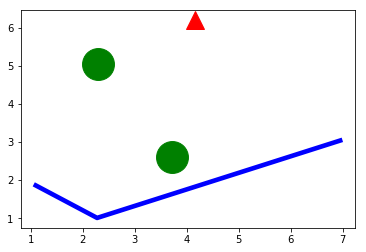

In [40]:
N = 100 # Toplumdaki kisi sayisi N
toplum = np.array([kisi2()  for i in range(N)])
olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

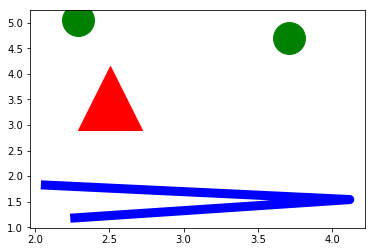

In [41]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

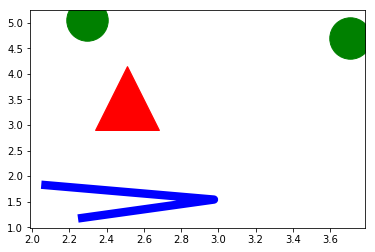

In [42]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

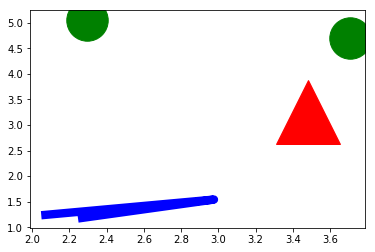

In [43]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

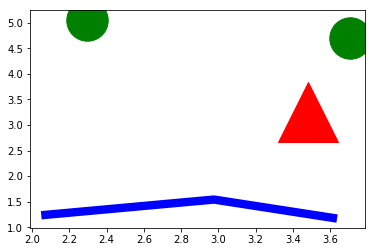

In [44]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

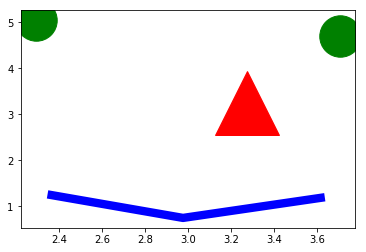

In [45]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

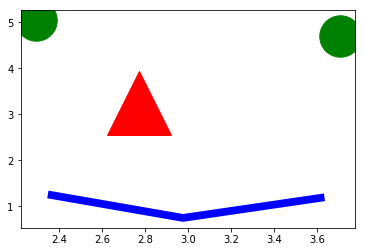

In [46]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

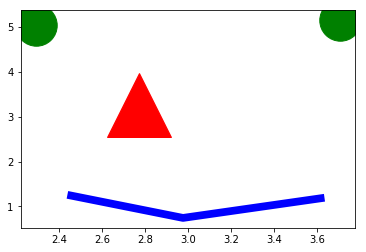

In [47]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

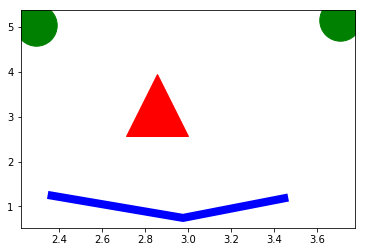

In [48]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

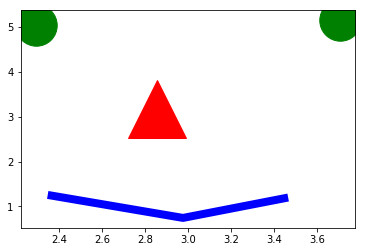

In [49]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

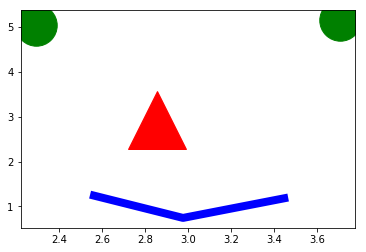

In [50]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

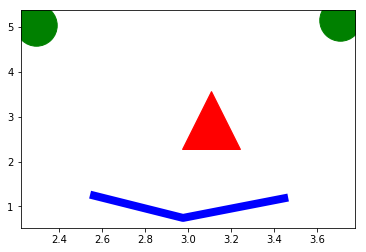

In [51]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

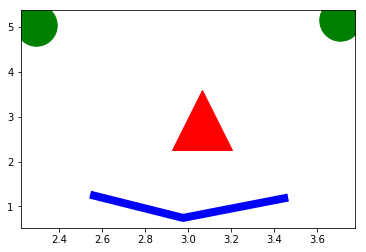

In [52]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

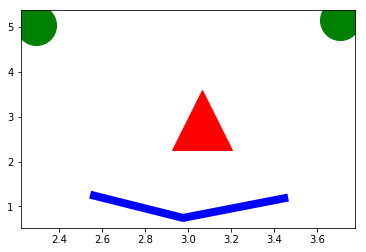

In [53]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

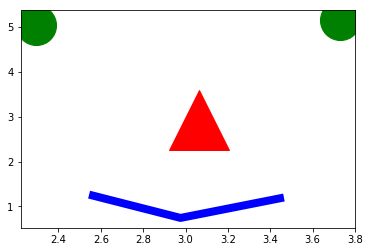

In [54]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

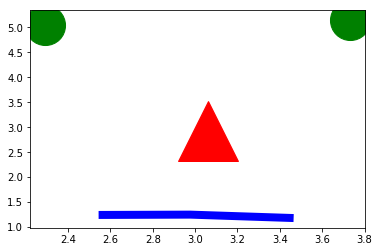

In [55]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

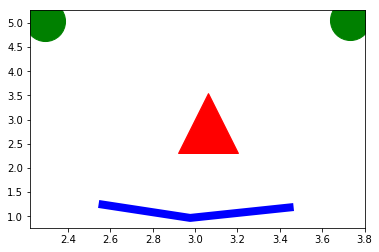

In [56]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

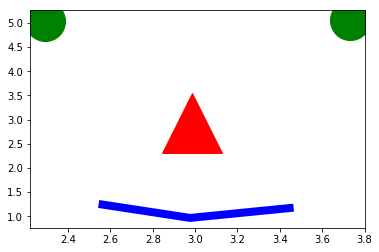

In [57]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

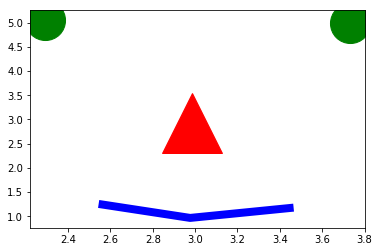

In [58]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

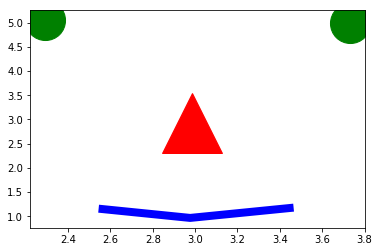

In [59]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

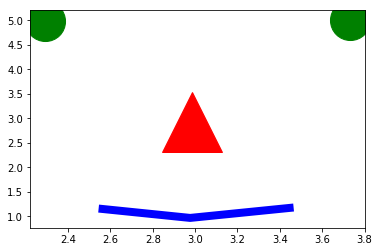

In [60]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

# Yeniden Dene - Genesys

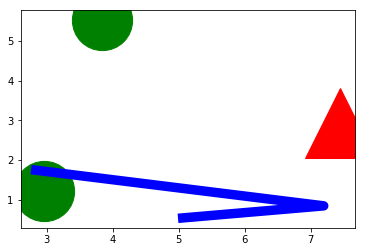

In [61]:
N = 100 # Toplumdaki kisi sayisi N
toplum = np.array([kisi2()  for i in range(N)])
olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

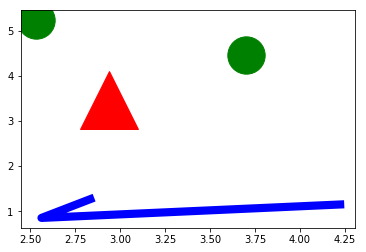

In [62]:
for i in range(100):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon2, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum2)

adam_ciz(en_iyi(toplum, olasiliklar))

# Yol bulma

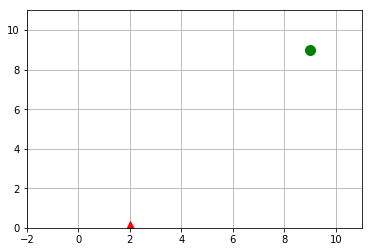

In [81]:
hx, hy = 9, 9  # hedef
x, y = 2, 0    # baslangic

yolx = [x]
yoly = [y]

def ciz():
    global x, y
    plt.plot(hx, hy, 'go', markersize=10)
    plt.plot(x, y, 'r^', markersize=15)
    plt.plot(yolx, yoly)
    plt.axis((-2,hx+2,0,hy+2))
    plt.grid()
    plt.show()

ciz()

In [82]:
def sag():
    global x, y
    x = x +1
    yolx.append(x)
    yoly.append(y)
    
def sol():
    global x, y
    x = x -1
    yolx.append(x)
    yoly.append(y)
    
def yukari():
    global x, y
    y = y + 1
    yolx.append(x)
    yoly.append(y)
    
def reset():
    global yolx, yoly, x, y
    x, y = 2, 0    # baslangic

    yolx = [x]
    yoly = [y] 

In [83]:
reset()

yukari()
sag()
yukari()
sag()
yukari()
sag()
yukari()
sol()
print(yolx)
print(yoly)

[2, 2, 3, 3, 4, 4, 5, 5, 4]
[0, 1, 1, 2, 2, 3, 3, 4, 4]


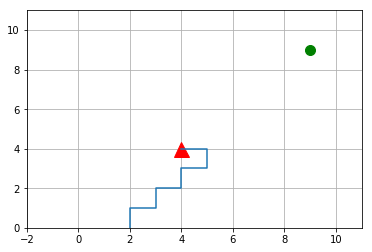

In [84]:
ciz()

In [85]:
hareket = {"YUK":yukari, "SAG":sag, "SOL":sol}

In [86]:
cozum = np.random.choice(["YUK","SAG","SOL"], 8)
cozum

array(['YUK', 'SAG', 'SOL', 'SAG', 'SOL', 'SOL', 'SAG', 'SAG'],
      dtype='<U3')

In [87]:
m = np.random.choice(len(cozum))
m

3

In [88]:
cozum[m] = np.random.choice(["YUK","SAG","SOL"])
cozum

array(['YUK', 'SAG', 'SOL', 'SOL', 'SOL', 'SOL', 'SAG', 'SAG'],
      dtype='<U3')

In [89]:
cozum1 = np.random.choice(["YUK","SAG","SOL"], 8)
cozum2 = np.random.choice(["YUK","SAG","SOL"], 8)
print(cozum1)
print(cozum2)

['SOL' 'SOL' 'SAG' 'YUK' 'SOL' 'YUK' 'SOL' 'SOL']
['SAG' 'SAG' 'SAG' 'SAG' 'SOL' 'SOL' 'SAG' 'SAG']


In [90]:
n =3
np.hstack((cozum1[:n],cozum2[n:]))

array(['SOL', 'SOL', 'SAG', 'SAG', 'SOL', 'SOL', 'SAG', 'SAG'],
      dtype='<U3')

In [91]:
 hareket['YUK']

<function __main__.yukari()>

[2, 2, 3, 2, 1, 0, -1, 0, 1]
[0, 1, 1, 1, 1, 1, 1, 1, 1]


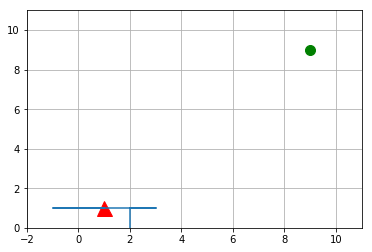

In [92]:
reset()
for c in cozum:
    hareket[c]()
print(yolx)
print(yoly)
ciz()

In [93]:
def cozumciz(cozum):
    reset()
    for c in cozum:
        hareket[c]()
    print(yolx)
    print(yoly)
    ciz()  

In [94]:
#################################################################
def kisi3(n = 8):
    """ n uzunlugunda OYA harflerinden olusan genotip
        ornek: kisi3() >> ['SAG', 'YUK', 'SOL', 'YUK', 'YUK', 'SAG', 'YUK', 'SOL']
    """
    return np.random.choice(["YUK","SAG","SOL"], n)

def uyum3(cozum):
    """ probleme gore uyum degisir. 
    Burada maksimizasyon probleminde, ne kadar cok bire sahipseniz o kadar uyumlusunuz."""
    reset()
    for c in cozum:
        hareket[c]()
    
    fark_kare = (yolx[-1] - hx)**2 + (yoly[-1] - hy)**2 
    return 1/(1+fark_kare**(0.5))

def mutasyon3(kisi, p):
    """ p olasilikla kisinin bir ozelligine OYA harflerinden rastgele
    biri atanir."""
    if np.random.rand() < p:
        m = np.random.choice(len(kisi))
        kisi[m] = np.random.choice(["YUK","SAG","SOL"])
            
#################################################################  

In [100]:
N = 10 # Toplumdaki kisi sayisi N
toplum = np.array([kisi3(n = 16)  for i in range(N)])
olasiliklar = olasilik(toplum, uyum=uyum3)

eniyi = en_iyi(toplum, olasiliklar)
eniyi

array(['SAG', 'YUK', 'YUK', 'SOL', 'SOL', 'SAG', 'YUK', 'SAG', 'SAG',
       'SAG', 'SAG', 'YUK', 'YUK', 'SAG', 'YUK', 'SAG'], dtype='<U3')

In [101]:
#toplum

[2, 3, 3, 3, 2, 1, 2, 2, 3, 4, 5, 6, 6, 6, 7, 7, 8]
[0, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5, 5, 6, 6]


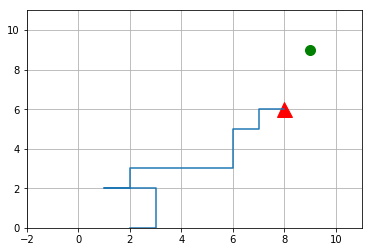

In [102]:
cozumciz(eniyi)

[2, 1, 1, 2, 3, 3, 2, 2, 2, 3, 4, 5, 5, 5, 6, 6, 7]
[0, 0, 1, 1, 1, 2, 2, 3, 4, 4, 4, 4, 5, 6, 6, 7, 7]


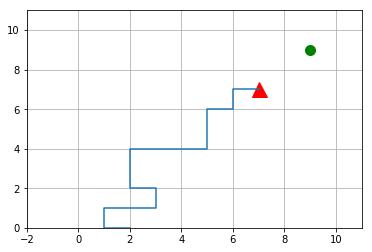

In [103]:
for i in range(10):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum3)
cozumciz(en_iyi(toplum, olasiliklar))

[2, 3, 3, 3, 4, 4, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 8]
[0, 0, 1, 2, 2, 3, 3, 4, 5, 5, 5, 5, 6, 7, 7, 8, 8]


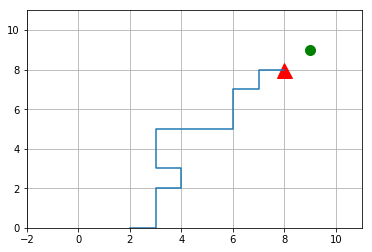

In [104]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum3)
cozumciz(en_iyi(toplum, olasiliklar))

[2, 3, 3, 4, 5, 5, 4, 4, 4, 5, 6, 6, 6, 6, 7, 7, 8]
[0, 0, 1, 1, 1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 7, 8, 8]


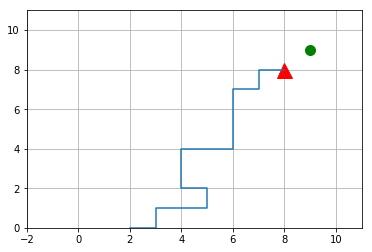

In [105]:
for i in range(5):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum3)
cozumciz(en_iyi(toplum, olasiliklar))

[2, 3, 3, 4, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 8, 8, 9]
[0, 0, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 9]


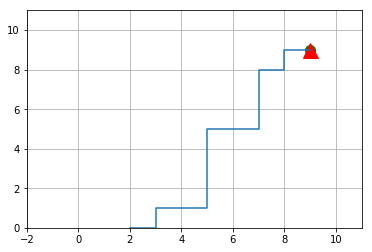

In [106]:
for i in range(20):
    toplum = yeni_toplum(toplum, olasiliklar, mutasyon = mutasyon3, p= 0.15) 
    olasiliklar = olasilik(toplum, uyum=uyum3)
cozumciz(en_iyi(toplum, olasiliklar))